# Proceso de Visualización de Datos

En este notebook se tomará el set de datos obtenido tras el proceso de **`Data Wrangling`** y con el se mostrarán ejemplos de **`Visualización de Datos`** con librerías de Python.

## Preparación y Herramientas necesarias
Lo primero que hay que realizar es la instalación de **openpyxl** (antiguamente conocido como **xlrd**) que es un módulo que **pandas** requiere para leer archivos Excel.

In [49]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


A continuación, se procederá a cargar los dos módulos claves para hacer análisis de datos **pandas** y
 **numpy**.


In [50]:
import numpy as np  # util para computación científica en Python
import pandas as pd # biblioteca que contienen la estructura de datos de uso principal

Ahora, se carga el conjunto de datos con los datos del excel usando el método de **pandas** `read_csv`.

In [51]:
path = "Datos_procesados.csv"
df_can = pd.read_csv(path, header = 0)

# df_can = pd.read_excel(
#     'Datos_procesados.csv',
#     sheet_name='datos',
#     skiprows=range(20),
#     skipfooter=2)

print('Datos leídos y cargados en un dataframe de pandas!')

Datos leídos y cargados en un dataframe de pandas!


Mostramos las primeras 5 filas del conjunto de datos usando la función `head()` para ver que todo está bien.

In [52]:
df_can.head()

,Unnamed: 0,id,timestamp,pmv,ppd,co2,pm25,pm10,temp,hr,...,temp(K),pm25-clasificacion,disconformidad-19%,disconformidad-20%,disconformidad-21%,disconformidad-22%,disconformidad-19%.1,disconformidad-20%.1,disconformidad-21%.1,disconformidad-22%.1
0,0,3909814,2022-04-28 15:40:00,0.88,21.0,1.0,0.0,-1.0,27.3,50.0,...,300.45,Bajo,0,0,1,0,0,0,1,0
1,1,3909794,2022-04-28 15:38:00,0.88,21.0,1.0,0.0,NaN,27.3,49.0,...,300.45,Bajo,0,0,1,0,0,0,1,0
2,2,3909774,2022-04-28 15:37:00,0.88,21.0,1.0,NaN,4.3,27.3,49.6,...,300.45,NaN,0,0,1,0,0,0,1,0
3,3,3909754,2022-04-28 15:36:00,0.88,21.0,NaN,2.4,3.0,NaN,49.6,...,NaN,Bajo,0,0,1,0,0,0,1,0
4,4,3909734,2022-04-28 15:35:00,NaN,NaN,1.0,2.6,3.7,27.3,49.4,...,300.45,Bajo,0,0,0,0,0,0,0,0


Revisamos la dimesión del conjunto de datos usando la función `shape` para ver que se cargaron todos los datos.

In [53]:
# dimensión del dataframe (rows, columns)
df_can.shape

(60, 25)

#### 1. Agregar columnas
Primero vemos que columnas necesitaremos agregar para crear las visualizaciones. Como el conjunto de datos que se está trabajando tiene el tiempo de las mediciones en formato Timestamp, sería util guardar en una columna solamente la Hora en que se registraron las mediciones.

In [54]:
df_can["Hora"] = pd.to_datetime(df_can["timestamp"], format="%Y-%m-%d %H:%M:%S").dt.strftime('%H:%M:%S')
df_can.head()

,Unnamed: 0,id,timestamp,pmv,ppd,co2,pm25,pm10,temp,hr,...,pm25-clasificacion,disconformidad-19%,disconformidad-20%,disconformidad-21%,disconformidad-22%,disconformidad-19%.1,disconformidad-20%.1,disconformidad-21%.1,disconformidad-22%.1,Hora
0,0,3909814,2022-04-28 15:40:00,0.88,21.0,1.0,0.0,-1.0,27.3,50.0,...,Bajo,0,0,1,0,0,0,1,0,15:40:00
1,1,3909794,2022-04-28 15:38:00,0.88,21.0,1.0,0.0,NaN,27.3,49.0,...,Bajo,0,0,1,0,0,0,1,0,15:38:00
2,2,3909774,2022-04-28 15:37:00,0.88,21.0,1.0,NaN,4.3,27.3,49.6,...,NaN,0,0,1,0,0,0,1,0,15:37:00
3,3,3909754,2022-04-28 15:36:00,0.88,21.0,NaN,2.4,3.0,NaN,49.6,...,Bajo,0,0,1,0,0,0,1,0,15:36:00
4,4,3909734,2022-04-28 15:35:00,NaN,NaN,1.0,2.6,3.7,27.3,49.4,...,Bajo,0,0,0,0,0,0,0,0,15:35:00


#### 2. Quitar columnas innecesarias
Se debe limpiar el conjunto de datos para eliminar las columnas que no son informativas para la visualización; en este caso quitaremos las columnas id, timestamp, idnodo, 20.836363636363636, Unnamed: 0.

In [55]:
df_can.drop(['id', 'timestamp', 'idnodo', 'Unnamed: 0','temp(K)'], axis=1, inplace=True)

# mostrar los primeros cinco elementos para ver cómo se cambió el dataframe
df_can.head()

,pmv,ppd,co2,pm25,pm10,temp,hr,voc,co,no2,...,pm25-clasificacion,disconformidad-19%,disconformidad-20%,disconformidad-21%,disconformidad-22%,disconformidad-19%.1,disconformidad-20%.1,disconformidad-21%.1,disconformidad-22%.1,Hora
0,0.88,21.0,1.0,0.0,-1.0,27.3,50.0,0.906977,0.027368,0.533981,...,Bajo,0,0,1,0,0,0,1,0,15:40:00
1,0.88,21.0,1.0,0.0,NaN,27.3,49.0,0.930233,0.028421,0.553398,...,Bajo,0,0,1,0,0,0,1,0,15:38:00
2,0.88,21.0,1.0,NaN,4.3,27.3,49.6,0.930233,0.027544,0.543689,...,NaN,0,0,1,0,0,0,1,0,15:37:00
3,0.88,21.0,NaN,2.4,3.0,NaN,49.6,0.930233,0.027544,0.533981,...,Bajo,0,0,1,0,0,0,1,0,15:36:00
4,NaN,NaN,1.0,2.6,3.7,27.3,49.4,0.930233,0.027368,0.543689,...,Bajo,0,0,0,0,0,0,0,0,15:35:00


#### 3. Renombrar Columnas
A continuación debemos cambiar el nombre de algunas de las columnas para que tengan más sentido y facilitar el análisis.

In [56]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region', 'temp':'Temperatura'}, inplace=True)

# mostrar los primeros cinco elementos para ver cómo se cambió el dataframe
df_can.head()

,pmv,ppd,co2,pm25,pm10,Temperatura,hr,voc,co,no2,...,pm25-clasificacion,disconformidad-19%,disconformidad-20%,disconformidad-21%,disconformidad-22%,disconformidad-19%.1,disconformidad-20%.1,disconformidad-21%.1,disconformidad-22%.1,Hora
0,0.88,21.0,1.0,0.0,-1.0,27.3,50.0,0.906977,0.027368,0.533981,...,Bajo,0,0,1,0,0,0,1,0,15:40:00
1,0.88,21.0,1.0,0.0,NaN,27.3,49.0,0.930233,0.028421,0.553398,...,Bajo,0,0,1,0,0,0,1,0,15:38:00
2,0.88,21.0,1.0,NaN,4.3,27.3,49.6,0.930233,0.027544,0.543689,...,NaN,0,0,1,0,0,0,1,0,15:37:00
3,0.88,21.0,NaN,2.4,3.0,NaN,49.6,0.930233,0.027544,0.533981,...,Bajo,0,0,1,0,0,0,1,0,15:36:00
4,NaN,NaN,1.0,2.6,3.7,27.3,49.4,0.930233,0.027368,0.543689,...,Bajo,0,0,0,0,0,0,0,0,15:35:00


#### 4. Etiquetas en mismo tipo
Para mantener la coherencia, asegúrese de que todas las etiquetas de las columnas sean de tipo cadena de caracteres o string.

In [57]:
# examinar los tipos de etiquetas de las columnas

all(isinstance(column, str) for column in df_can.columns)

True

## Visualizando Datos usando Matplotlib
Una vez preparado nuestro set de datos podemos proceder a visualizar nuestros datos con la herramienta **Matplotlib**, a continuación revisaremos los distintos tipos de gráficos que podemos utilizar para vizualizar nuestros datos.

#### Importar Matplotlib
Importar la biblioteca `matplotlib`.

In [58]:
# Esta línea de codigo espara realizar el despliegue de figuras en línea o dentro de Jupyter Notebook
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

# Opcional: Aplica un estilo similar a ggplot
mpl.style.use('ggplot')  

# verificar la versión de Matplotlib
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.4.3


### Gráficos de Línea
**-** Un gráfico de líneas es un tipo de gráficos el cual despliega la información como una serie de puntos de datos conectados por un segmento de línea recta.

Para nuestro set de datos podemos utilizar este tipo de gráfico para responder a la pregunta:
**¿Cómo es el comportamiento de los distintos contaminantes en el tiempo registrado?**

El primer paso para responder a nuestra pregunta es extraer los datos relacionados a los contaminantes (`co`, `co2`, `no2`, `c2h5ch`, `voc`) y la `Hora` de cada registro.

In [59]:
df_linea= df_can.loc[: , {"Hora","co","co2","no2","c2h5ch","voc"}]
#Se asigna la Hora como index para el nuevo data set
df_linea=df_linea.set_index('Hora')
df_linea.head()

,c2h5ch,co,no2,voc,co2
Hora,,,,,
15:40:00,0.990385,0.027368,0.533981,0.906977,1.0
15:38:00,1.000000,0.028421,0.553398,0.930233,1.0
15:37:00,1.000000,0.027544,0.543689,0.930233,1.0
15:36:00,1.000000,0.027544,0.533981,0.930233,NaN
15:35:00,1.000000,0.027368,0.543689,0.930233,1.0


A continuación, se trazará un gráfico de líneas con los datos obtenidos en `df_linea`.

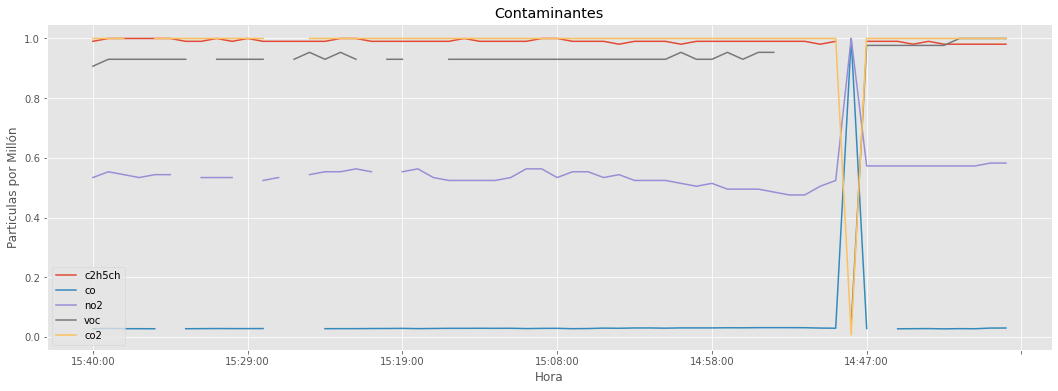

In [60]:
df_linea.plot(kind='line',
             stacked=False,
             figsize=(18, 6))  # pasa un tamaño en la tupla (x, y)

plt.title('Contaminantes')
plt.ylabel('Particulas por Millón')

plt.show()

Con ayuda del gráfico obtenido podemos responder a la pregunta planteada. Vemos que los distintos contaminantes tienen un comportamiento similar, pero cuando ocurre una perturbación y disminuyen los niveles de `CO2`, los niveles de `CO` y `NO2` aumentan en conjunto.

### Gráficos de Dispersión
**-** Un gráfico de dispersión es útil para comparar variables entre sí.

Para nuestro set de datos podemos utilizar este tipo de gráfico para responder a la pregunta:
**¿Cúal es la relación entre la Temperatura y la Humedad relativa registrada por los sensores?**

El primer paso para responder a nuestra pregunta es extraer los datos relacionados a la `Temperatura` registrada y la media de la `Humedad Relativa` registrada para cada temperatura.

In [61]:
# usar el método sum() para obtener la media de Humedad relativa por cada Temp
df_Temp = pd.DataFrame(df_can.groupby("Temperatura")[["hr"]].mean())
# restablecer el índice para volver a colocarlo como una columna en el dataframe df_total
df_Temp.reset_index(inplace = True)
# renombrar columnas
df_Temp.columns = ['Temperatura', 'Humedad_Relativa']

df_Temp

,Temperatura,Humedad_Relativa
0,27.1,50.657143
1,27.2,50.717647
2,27.3,50.021429
3,49.7,43.000000


Como el diagrama de dispersión no conecta los puntos de datos entre sí, podemos trazar una línea de mejor y usarla para entender la relación entre las 2 variables.

In [62]:
x = df_Temp['Temperatura']      # año en el eje x
y = df_Temp['Humedad_Relativa']     # total en el eje y
ajuste = np.polyfit(x, y, deg=1)

A continuación, se trazará un gráfico de dispersión con los datos obtenidos en `df_Temp`.

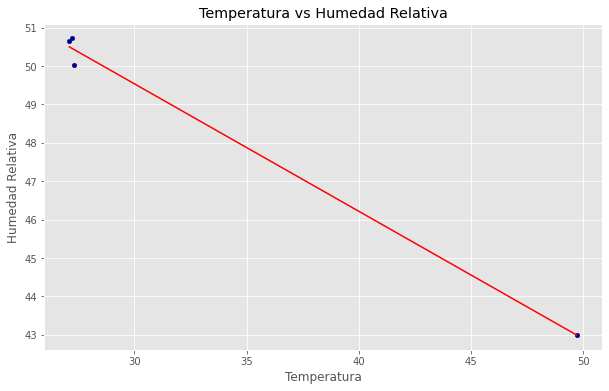

In [63]:
df_Temp.plot(kind='scatter', x='Temperatura', y='Humedad_Relativa', figsize=(10, 6), color='darkblue')

plt.title('Temperatura vs Humedad Relativa')
plt.ylabel('Humedad Relativa')

# trazar la línea del mejor ajuste
plt.plot(x, ajuste[0] * x + ajuste[1], color='red') # recordar que x son los años
plt.annotate('y={0:.0f} x + {1:.0f}'.format(ajuste[0], ajuste[1]), xy=(2000, 150000))

plt.show()


Con ayuda del gráfico obtenido podemos responder a la pregunta planteada. Vemos que la `Temperatura` tiene una relación inversamente proporcional a la `Humedad Relativa` del lugar, osea a medida que la Temperatura sube, la Humedad relativa disminuye.

### Gráfico de Barras

### Gráfico de Áreas